## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 1.2452 - accuracy: 0.7094 - val_loss: 0.8040 - val_accuracy: 0.8294
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.7110 - accuracy: 0.8390 - val_loss: 0.6065 - val_accuracy: 0.8605
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5854 - accuracy: 0.8582 - val_loss: 0.5265 - val_accuracy: 0.8727
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5246 - accuracy: 0.8688 - val_loss: 0.4809 - val_accuracy: 0.8796
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.4874 - accuracy: 0.8757 - val_loss: 0.4512 - val_accuracy: 0.8832
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.4618 - accuracy: 0.8804 - val_loss: 0.4300 - val_accuracy: 0.8876
Epoch 7/20
60000/60000 [==============================] - 2s 25us/s

Test score: 0.3360935353994369
Test accuracy: 0.9089000225067139


<IPython.core.display.Javascript object>


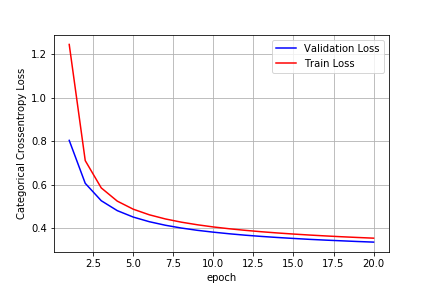

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 2.2607 - accuracy: 0.2370 - val_loss: 2.2153 - val_accuracy: 0.4839
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.1682 - accuracy: 0.4685 - val_loss: 2.1094 - val_accuracy: 0.6104
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 2.0450 - accuracy: 0.5841 - val_loss: 1.9610 - val_accuracy: 0.6890
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 1.8702 - accuracy: 0.6382 - val_loss: 1.7538 - val_accuracy: 0.6820
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 1.6456 - accuracy: 0.6795 - val_loss: 1.5117 - val_accuracy: 0.6971
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 1.4083 - accuracy: 0.7151 - val_loss: 1.2827 - val_accuracy: 0.7655
Epoch 7/20
60000/60000 [==============================] - 6s 98

Test score: 0.46379549462795255
Test accuracy: 0.8758999705314636


<IPython.core.display.Javascript object>


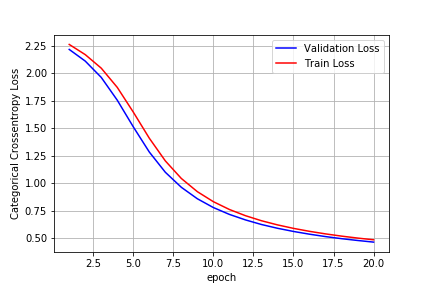

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


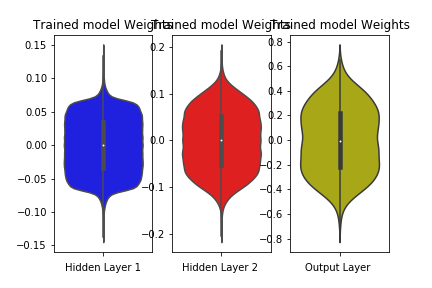

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.5295 - accuracy: 0.8626 - val_loss: 0.2482 - val_accuracy: 0.9280
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2197 - accuracy: 0.9359 - val_loss: 0.1859 - val_accuracy: 0.9446
Epoch 3/20
60000/60000 [======

Test score: 0.07166502268087498
Test accuracy: 0.9797999858856201


<IPython.core.display.Javascript object>


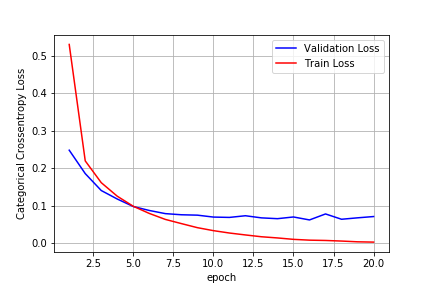

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


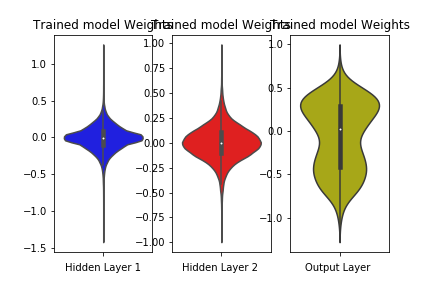

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.7175 - accuracy: 0.8036 - val_loss: 0.3799 - val_accuracy: 0.8941
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3428 - accuracy: 0.9044 - val_loss: 0.2972 - val_accuracy: 0.9151
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2830 - accuracy: 0.9199 - val_loss: 0.2570 - val_accuracy: 0.9264
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2498 - accuracy: 0.9293 - val_loss: 0.2357 - val_accuracy: 0.9321
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2267 - accuracy: 0.9354 - val_loss: 0.2170 - val_accuracy: 0.9369
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2087 - accuracy: 0.9410 - val_loss: 0.2025 - val_accuracy: 0.9423
Epoch 7/20
60000/60000 [==============================] - 10s 166u

Test score: 0.12400117258317768
Test accuracy: 0.9620000123977661


<IPython.core.display.Javascript object>


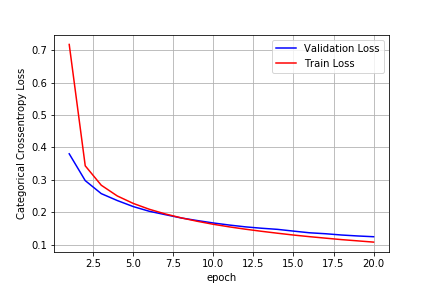

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


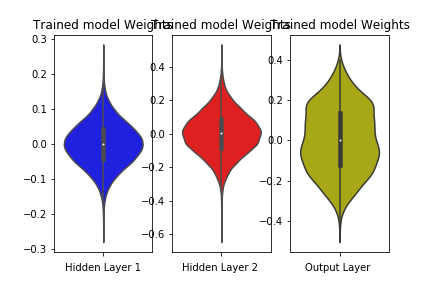

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.2276 - accuracy: 0.9326 - val_loss: 0.1111 - val_accuracy: 0.9658
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 0.0918 - val_accuracy: 0.9696
Epoch 3/20
60000/60000 [=

Test score: 0.11079006246657537
Test accuracy: 0.9771999716758728


<IPython.core.display.Javascript object>


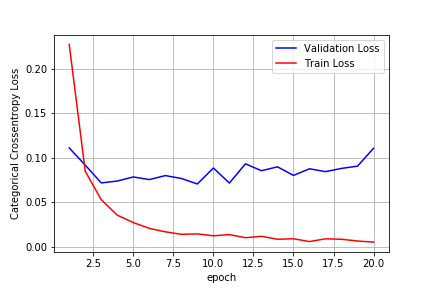

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


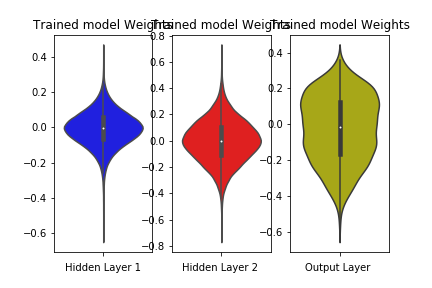

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 342us/step - loss: 0.3066 - accuracy: 0.9081 - val_loss: 0.2064 - val_accuracy: 0.9407
Epoch 2/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.1801 - accuracy: 0.9462 - val_loss: 0.1706 - val_accuracy: 0.9512
Epoch 3/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.1398 - accuracy: 0.9588 - val_loss: 0.1561 - val_accuracy: 0.9541
Epoch 4/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.1130 - accuracy: 0.9661 - val_loss: 0.1399 - val_accuracy: 0.9596
Epoch 5/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0944 - accuracy: 0.9720 - val_loss: 0.1235 - val_accuracy: 0.9628
Epoch 6/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0808 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 0.9650
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.10415376693319994
Test accuracy: 0.9722999930381775


<IPython.core.display.Javascript object>


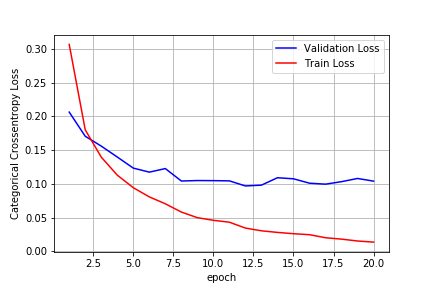

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


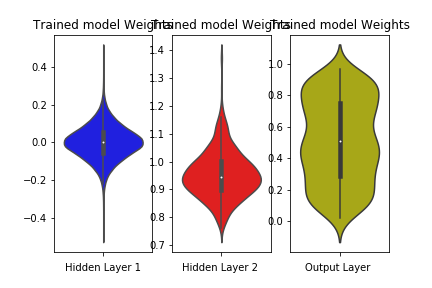

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.6794 - accuracy: 0.7914 - val_loss: 0.2815 - val_accuracy: 0.9163
Epoch 2/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.4291 - accuracy: 0.8691 - val_loss: 0.2529 - val_accuracy: 0.9248
Epoch 3/20
60000/60000 [==============================] - 20s 325us/step - loss: 0.3868 - accuracy: 0.8824 - val_loss: 0.2349 - val_accuracy: 0.9311
Epoch 4/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.3575 - accuracy: 0.8934 - val_loss: 0.2235 - val_accuracy: 0.9352
Epoch 5/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.3419 - accuracy: 0.8969 - val_loss: 0.2072 - val_accuracy: 0.9394
Epoch 6/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.3215 - accuracy: 0.9015 - val_loss: 0.2033 - val_accuracy: 0.9403
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.11127507402859628
Test accuracy: 0.9668999910354614


<IPython.core.display.Javascript object>


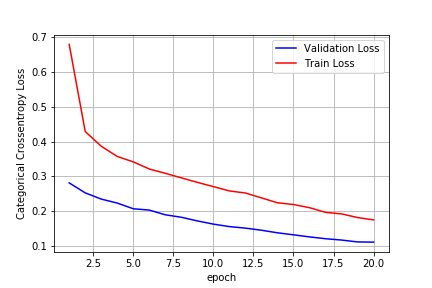

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


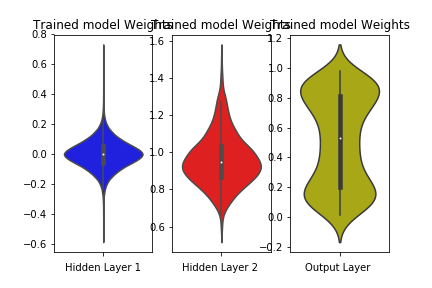

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [38]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977750 using {'activ': 'relu'}
0.977000 (0.001574) with: {'activ': 'sigmoid'}
0.977750 (0.001906) with: {'activ': 'relu'}


784-400-250-10 model with dropout

In [41]:
model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 250)               100250    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                2510      
Total params: 416,760
Trainable params: 416,760
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.7494 - accuracy: 0.7843 - val_loss: 0.2166 - val_accuracy: 0.9387
Epoch 2/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.3349 - accuracy: 0.9019 - val_loss: 0.1584 - val_accuracy: 0.9544
Epoch 3/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.2618 - accuracy: 0.9238 - val_loss: 0.1323 - val_accuracy: 0.9612
Epoch 4/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.2214 - accuracy: 0.9358 - val_loss: 0.1222 - val_accuracy: 0.9640
Epoch 5/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.2000 - accuracy: 0.9417 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 6/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.1816 - accuracy: 0.9475 - val_loss: 0.1076 - val_accuracy: 0.9698
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.07859424627450352
Test accuracy: 0.9779999852180481


<IPython.core.display.Javascript object>


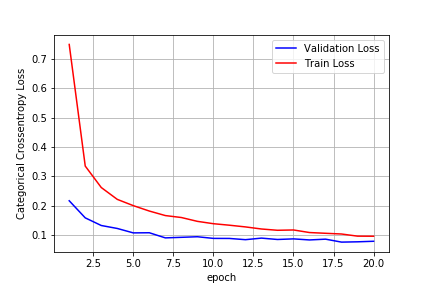

In [43]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

first_1 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


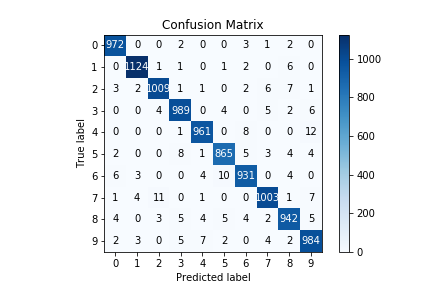

In [44]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-400-250-10 model with batch normalisation

In [45]:
model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_57 (Dense)             (None, 250)               100250    
_________________________________________________________________
batch_normalization_6 (Batch (None, 250)               1000      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                2510      
Total params: 419,360
Trainable params: 418,060
Non-trainable params: 1,300
_________________________________________________________________


In [46]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.1960 - accuracy: 0.9411 - val_loss: 0.1154 - val_accuracy: 0.9635
Epoch 2/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0745 - accuracy: 0.9775 - val_loss: 0.0919 - val_accuracy: 0.9712
Epoch 3/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 4/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0824 - val_accuracy: 0.9740
Epoch 5/20
60000/60000 [==============================] - 20s 325us/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0854 - val_accuracy: 0.9735
Epoch 6/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.08297608194136047
Test accuracy: 0.979200005531311


<IPython.core.display.Javascript object>


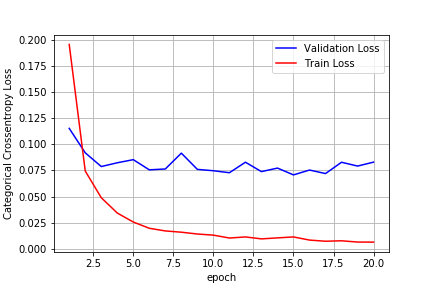

In [47]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
first_2 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


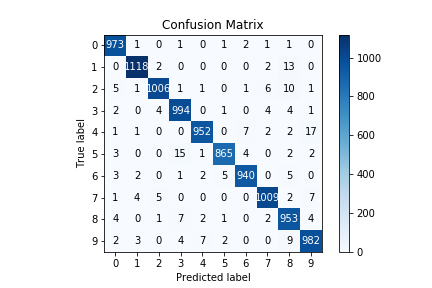

In [48]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-400-250-10 model with batch normalisation and dropout

In [49]:
model_drop = Sequential()

model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 250)               100250    
_________________________________________________________________
batch_normalization_8 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)              

In [50]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 426us/step - loss: 0.4870 - accuracy: 0.8523 - val_loss: 0.1786 - val_accuracy: 0.9455
Epoch 2/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.2490 - accuracy: 0.9236 - val_loss: 0.1288 - val_accuracy: 0.9609
Epoch 3/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.2000 - accuracy: 0.9394 - val_loss: 0.1067 - val_accuracy: 0.9669
Epoch 4/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.1713 - accuracy: 0.9477 - val_loss: 0.0951 - val_accuracy: 0.9696
Epoch 5/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.1507 - accuracy: 0.9537 - val_loss: 0.0939 - val_accuracy: 0.9706
Epoch 6/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.1402 - accuracy: 0.9573 - val_loss: 0.0858 - val_accuracy: 0.9731
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.060422330952537594
Test accuracy: 0.9822999835014343


<IPython.core.display.Javascript object>


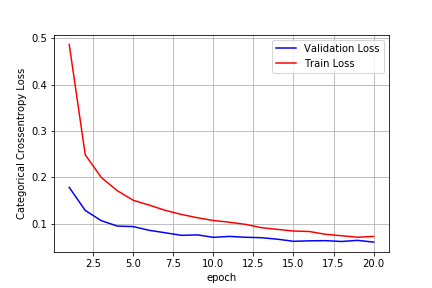

In [51]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
first_3 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


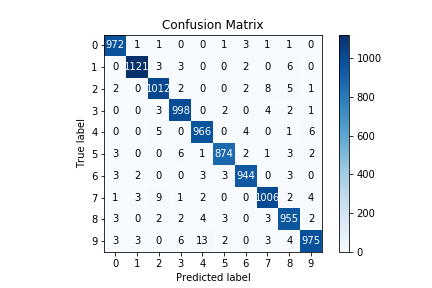

In [52]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-250-10 model with  dropout

In [53]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)              

In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 411us/step - loss: 5.6630 - accuracy: 0.3146 - val_loss: 1.2045 - val_accuracy: 0.5896
Epoch 2/20
60000/60000 [==============================] - 23s 376us/step - loss: 1.5286 - accuracy: 0.4616 - val_loss: 1.0148 - val_accuracy: 0.6395
Epoch 3/20
60000/60000 [==============================] - 27s 454us/step - loss: 1.3356 - accuracy: 0.5285 - val_loss: 0.8904 - val_accuracy: 0.6872
Epoch 4/20
60000/60000 [==============================] - 22s 374us/step - loss: 1.1947 - accuracy: 0.5831 - val_loss: 0.7850 - val_accuracy: 0.7325
Epoch 5/20
60000/60000 [==============================] - 23s 382us/step - loss: 1.0543 - accuracy: 0.6477 - val_loss: 0.6306 - val_accuracy: 0.7961
Epoch 6/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.9392 - accuracy: 0.6917 - val_loss: 0.5202 - val_accuracy: 0.8253
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.35313249151706694
Test accuracy: 0.8759999871253967


<IPython.core.display.Javascript object>


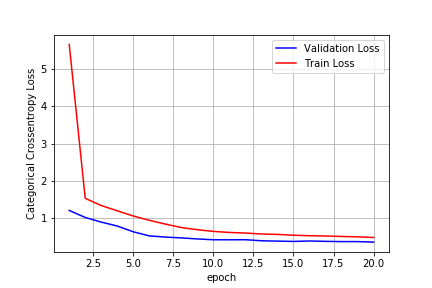

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
second_1 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


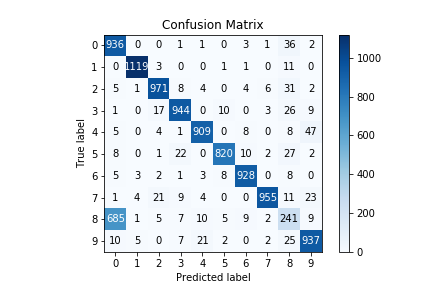

In [56]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-250-10 model with batch normalisation



In [57]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_9 (Batch (None, 600)               2400      
_________________________________________________________________
dense_67 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_10 (Batc (None, 500)               2000      
_________________________________________________________________
dense_68 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_11 (Batc (None, 250)               1000      
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

In [58]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 594us/step - loss: 0.1845 - accuracy: 0.9439 - val_loss: 0.0936 - val_accuracy: 0.97171957 -  - E
Epoch 2/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0965 - val_accuracy: 0.9687
Epoch 3/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0801 - val_accuracy: 0.9746
Epoch 4/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 5/20
60000/60000 [==============================] - 29s 484us/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0766 - val_accuracy: 0.9757
Epoch 6/20
60000/60000 [==============================] - 29s 487us/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0818 - val_accuracy: 0.9759l - ETA: 1s - loss: 0 - ETA: 1s - loss: 0.0 - 

Test score: 0.07154271629433848
Test accuracy: 0.9830999970436096


C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


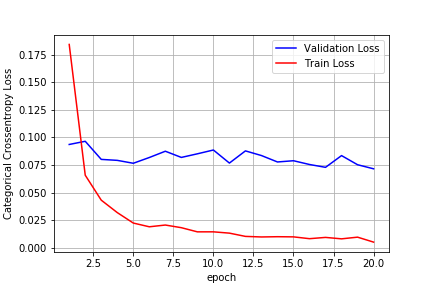

In [59]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
second_2 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


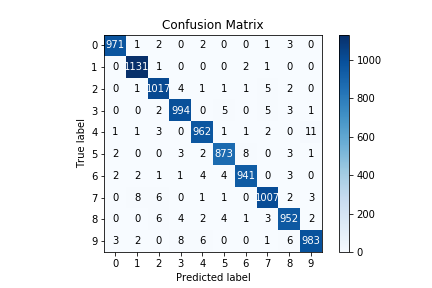

In [60]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-250-10 model with batch normalisation and dropout

In [61]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_12 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_10 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_13 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_11 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 250)             

In [62]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 955us/step - loss: 0.6734 - accuracy: 0.7911 - val_loss: 0.2105 - val_accuracy: 0.9344
Epoch 2/20
60000/60000 [==============================] - 44s 726us/step - loss: 0.3046 - accuracy: 0.9082 - val_loss: 0.1509 - val_accuracy: 0.9522A: 26s - loss: 0.3353 - accuracy: 0 - ETA: 26s - loss: 0.3340 - accuracy: 0.8 - ETA: 26s - loss: 0.3323 - accuracy: 0.899 - ETA: 25s - loss: 0.3320 - accuracy:  - ETA: 25s - loss: 0. - ETA: 23s - loss: 0.33 - ETA: 21s - loss: 0.3299 - acc - ETA: 20s - loss: 0.3289 - accurac - ETA: 4s - loss:
Epoch 3/20
60000/60000 [==============================] - 47s 777us/step - loss: 0.2350 - accuracy: 0.9296 - val_loss: 0.1232 - val_accuracy: 0.9610
Epoch 4/20
60000/60000 [==============================] - 47s 777us/step - loss: 0.1995 - accuracy: 0.9401 - val_loss: 0.1096 - val_accuracy: 0.9657
Epoch 5/20
60000/60000 [==============================] - 43s 

Test score: 0.06040368790557841
Test accuracy: 0.982200026512146


C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


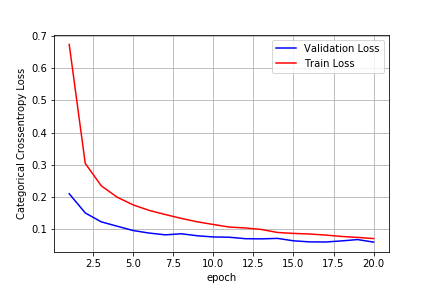

In [63]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
second_3 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


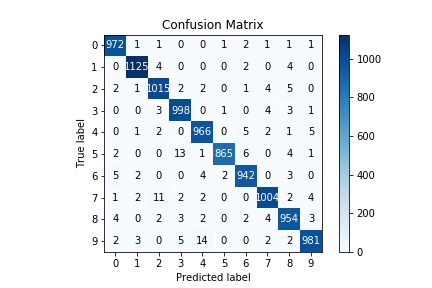

In [64]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-400-300-200-10 model with dropout

In [65]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_14 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 300)             

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 516us/step - loss: 422.5219 - accuracy: 0.1038 - val_loss: 2.4589 - val_accuracy: 0.1124 1s - loss: 437
Epoch 2/20
60000/60000 [==============================] - 28s 467us/step - loss: 4.1316 - accuracy: 0.1110 - val_loss: 2.3373 - val_accuracy: 0.1148
Epoch 3/20
60000/60000 [==============================] - 34s 559us/step - loss: 2.9623 - accuracy: 0.1119 - val_loss: 2.3235 - val_accuracy: 0.1137
Epoch 4/20
60000/60000 [==============================] - 33s 546us/step - loss: 2.5956 - accuracy: 0.1123 - val_loss: 2.3179 - val_accuracy: 0.1134
Epoch 5/20
60000/60000 [==============================] - 31s 522us/step - loss: 2.4333 - accuracy: 0.1123 - val_loss: 2.3142 - val_accuracy: 0.1137
Epoch 6/20
60000/60000 [==============================] - 31s 522us/step - loss: 2.3887 - accuracy: 0.1125 - val_loss: 2.3200 - val_accuracy: 0.1137
Epoch 7/20
60000/60000 [===============

Test score: 2.307284020996094
Test accuracy: 0.11349999904632568


C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


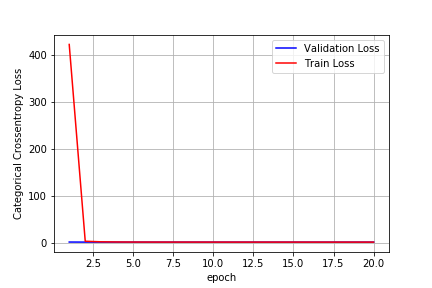

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
third_1 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


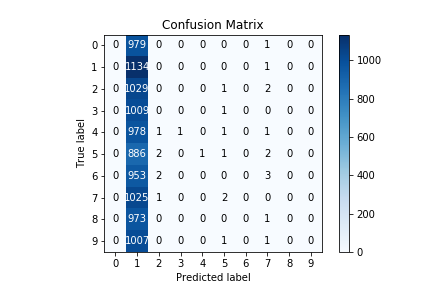

In [68]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-400-300-200-10 model with batch normalisation

In [69]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_15 (Batc (None, 600)               2400      
_________________________________________________________________
dense_81 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 500)               2000      
_________________________________________________________________
dense_82 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dense_83 (Dense)             (None, 300)             

In [70]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 55s 924us/step - loss: 0.2320 - accuracy: 0.9299 - val_loss: 0.1257 - val_accuracy: 0.9596
Epoch 2/20
60000/60000 [==============================] - 51s 845us/step - loss: 0.0789 - accuracy: 0.9758 - val_loss: 0.1042 - val_accuracy: 0.9680
Epoch 3/20
60000/60000 [==============================] - 51s 843us/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 4/20
60000/60000 [==============================] - 52s 869us/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0959 - val_accuracy: 0.9709
Epoch 5/20
60000/60000 [==============================] - 49s 808us/step - loss: 0.0335 - accuracy: 0.9887 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 6/20
60000/60000 [==============================] - 48s 794us/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0840 - val_accuracy: 0.9757
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.07619471673628853
Test accuracy: 0.9821000099182129


C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


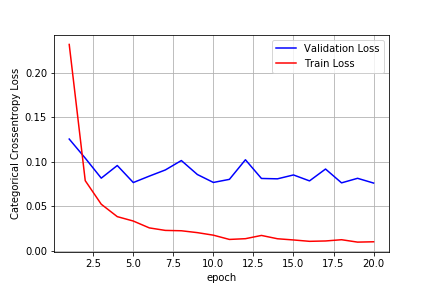

In [71]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
third_2 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


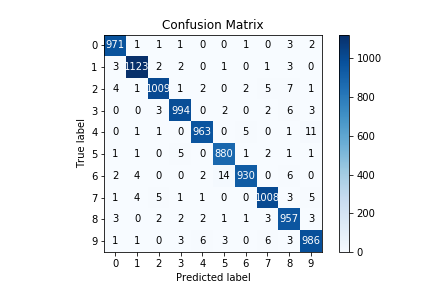

In [72]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

784-600-500-400-300-200-10 model with batch normalisation and dropout

In [73]:
model_drop = Sequential()

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))




model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_20 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_18 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_21 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_19 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 400)             

In [74]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 68s 1ms/step - loss: 1.4857 - accuracy: 0.5218 - val_loss: 0.4887 - val_accuracy: 0.8527
Epoch 2/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.5621 - accuracy: 0.8240 - val_loss: 0.2641 - val_accuracy: 0.9221
Epoch 3/20
60000/60000 [==============================] - 60s 998us/step - loss: 0.3946 - accuracy: 0.8819 - val_loss: 0.2052 - val_accuracy: 0.9384
Epoch 4/20
60000/60000 [==============================] - 58s 967us/step - loss: 0.3143 - accuracy: 0.9079 - val_loss: 0.1713 - val_accuracy: 0.9498
Epoch 5/20
60000/60000 [==============================] - 57s 948us/step - loss: 0.2652 - accuracy: 0.9219 - val_loss: 0.1543 - val_accuracy: 0.9558
Epoch 6/20
60000/60000 [==============================] - 57s 952us/step - loss: 0.2345 - accuracy: 0.9324 - val_loss: 0.1423 - val_accuracy: 0.9594
Epoch 7/20
60000/60000 [==============================] - 57

Test score: 0.07378138729266356
Test accuracy: 0.9815000295639038


C:\Users\hemant\AnacondaNew\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


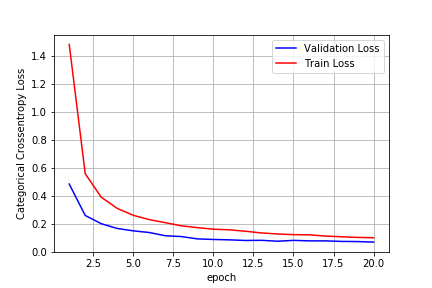

In [75]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
third_3 = score[1]

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


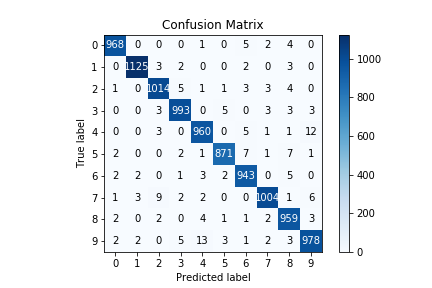

In [76]:
pred=model_drop.predict(X_test)
#pred= (pred>0.5) 
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

In [78]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","accuracy"]
x.add_row(["784-400-250-10 model with dropout",first_1])
x.add_row(["784-400-250-10 model with batch normalisation",first_2])
x.add_row(["784-400-250-10 model with batch normalisation and dropout",first_3])
x.add_row(["784-600-500-250-10 model with dropout",second_1])           
x.add_row(["784-600-500-250-10 model with batch normalisation",second_2])
x.add_row(["784-600-500-250-10 model with batch normalisation and dropout",second_3])
x.add_row(["784-600-500-400-300-200-10 model with dropout",third_1])
x.add_row(["784-600-500-400-300-200-10 model with batch normalisation",third_2]) 
x.add_row(["784-600-500-400-300-200-10 model with batch normalisation and dropout",third_3]) 
           
            
           

In [79]:
print(x)

+-----------------------------------------------------------------------+---------------------+
|                                 model                                 |       accuracy      |
+-----------------------------------------------------------------------+---------------------+
|                   784-400-250-10 model with dropout                   |  0.9779999852180481 |
|             784-400-250-10 model with batch normalisation             |  0.979200005531311  |
|       784-400-250-10 model with batch normalisation and dropout       |  0.9822999835014343 |
|                 784-600-500-250-10 model with dropout                 |  0.8759999871253967 |
|           784-600-500-250-10 model with batch normalisation           |  0.9830999970436096 |
|     784-600-500-250-10 model with batch normalisation and dropout     |  0.982200026512146  |
|             784-600-500-400-300-200-10 model with dropout             | 0.11349999904632568 |
|       784-600-500-400-300-200-10 model

accordingly above table,"784-600-500-250-10 model with batch normalisation" have highest accuracy. so we will use this model.  